In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import statistics as st
from datetime import datetime
from matplotlib.pylab import rcParams
import warnings;
warnings.simplefilter("ignore")
from matplotlib.pylab import rcParams
from datetime import datetime
import os
from pmdarima.arima import auto_arima
sns.set()
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error as mae, mean_squared_error

In [2]:
rcParams["figure.figsize"] = 20, 10



data = pd.read_excel("Exc.xlsx", index_col=0)


In [3]:
size = int(len(data) * 0.8)
train, test = data[0:size], data[size:len(data)]


In [4]:
from pmdarima.arima.stationarity import ADFTest

# Test whether we should difference at the alpha=0.05
# significance level
adf_test = ADFTest(alpha=0.05)
p_val, should_diff = adf_test.should_diff(train)  # (0.01, False)
p_val

0.9276928708850656

In [5]:
from pmdarima.arima.utils import ndiffs

# Estimate the number of differences using an ADF test:
n_adf = ndiffs(train, test='adf')
n_adf

2

## AUTO ARIMA

In [6]:
model = auto_arima(train, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=944.484, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=939.096, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=942.573, Time=0.03 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=930.276, Time=0.09 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.67 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=838.912, Time=1.07 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=839.057, Time=1.01 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=898.026, Time=0.90 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=836.940, Time=0.55 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.25 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=inf, Time=0.90 sec
 ARIMA(3,2,2)(0,0,0)[0]             : AIC=836.768, Time=0.45 sec
 ARIMA

## PLOT AUTO ARIMA

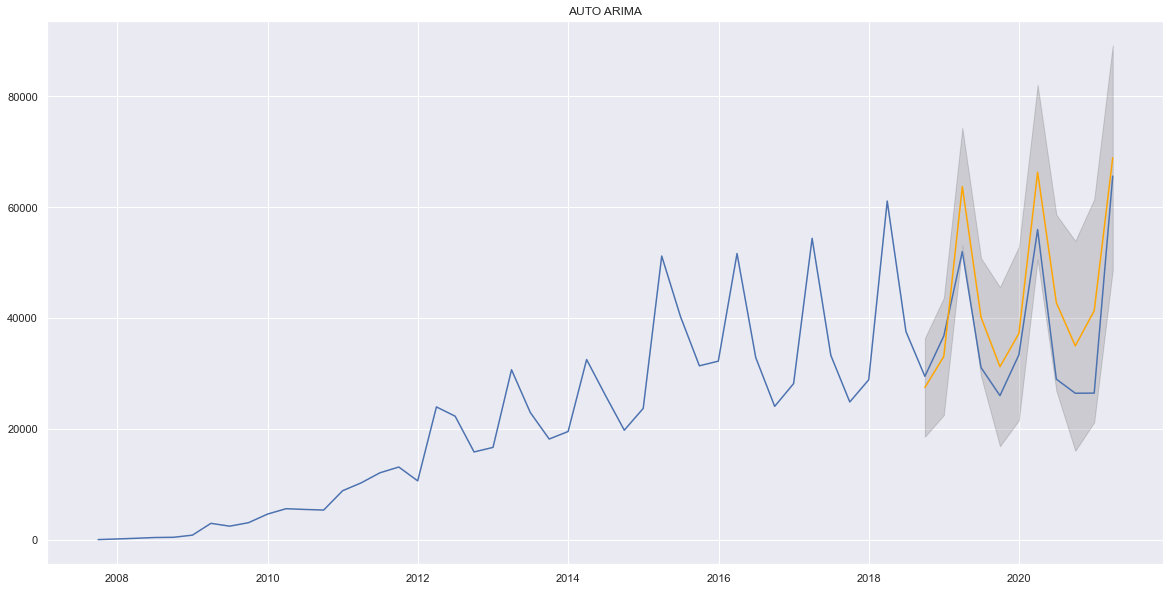

In [7]:
# Forecast
n_periods = 11
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(data), len(data)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=data.index[44:])
lower_series = pd.Series(confint[:, 0], index=data.index[44:])
upper_series = pd.Series(confint[:, 1], index=data.index[44:])

# Plot

plt.plot(data)
plt.plot(fc_series, color='orange')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("AUTO ARIMA")
plt.show()

TEST

In [8]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error as mae, mean_squared_error
print("MSE:", mean_squared_error(test.values, fc_series.values),
     "MAPE:", mean_absolute_percentage_error(test.values, fc_series.values),
      "MAE:", mae(test.values, fc_series.values),
      "RMSE:", np.sqrt(mean_squared_error(test.values, fc_series.values)))

MSE: 80232686.08745255 MAPE: 0.23645568258833727 MAE: 7861.456669611062 RMSE: 8957.270013092859


In [9]:
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(test.values, fc_series.values))

0.23645568258833727


## AUTO SARIMA

In [10]:
smodel = auto_arima(train, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=4,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,1,1)[4]             : AIC=inf, Time=0.35 sec
 ARIMA(0,2,0)(0,1,0)[4]             : AIC=780.136, Time=0.02 sec
 ARIMA(1,2,0)(1,1,0)[4]             : AIC=774.762, Time=0.05 sec
 ARIMA(0,2,1)(0,1,1)[4]             : AIC=inf, Time=0.24 sec
 ARIMA(1,2,0)(0,1,0)[4]             : AIC=773.108, Time=0.02 sec
 ARIMA(1,2,0)(0,1,1)[4]             : AIC=774.864, Time=0.05 sec
 ARIMA(1,2,0)(1,1,1)[4]             : AIC=776.663, Time=0.14 sec
 ARIMA(2,2,0)(0,1,0)[4]             : AIC=764.802, Time=0.03 sec
 ARIMA(2,2,0)(1,1,0)[4]             : AIC=766.476, Time=0.07 sec
 ARIMA(2,2,0)(0,1,1)[4]             : AIC=766.594, Time=0.07 sec
 ARIMA(2,2,0)(1,1,1)[4]             : AIC=768.247, Time=0.22 sec
 ARIMA(3,2,0)(0,1,0)[4]             : AIC=766.337, Time=0.04 sec
 ARIMA(2,2,1)(0,1,0)[4]             : AIC=759.944, Time=0.32 sec
 ARIMA(2,2,1)(1,1,0)[4]             : AIC=inf, Time=0.42 sec
 ARIMA(2,2,1)(0,1,1)[4]             : AIC=760.917, Time=0.5

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   44
Model:             SARIMAX(2, 2, 1)x(0, 1, [], 4)   Log Likelihood                -374.813
Date:                            Wed, 29 Sep 2021   AIC                            759.627
Time:                                    22:24:54   BIC                            767.815
Sample:                                         0   HQIC                           762.540
                                             - 44                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -8.8234     64.183     -0.137      0.891    -134.620     116.973
ar.L1         -0.0812      0.152     -0.536      0.592      -0.378       0.216
ar.L2         -0.1774      0.215     -0.825      0.410      -0.599       0.244
ma.L1         -0.9822      0.216     -4.557      0.000      -1.405      -0.560
sigma2       2.07e+07   6.76e-05   3.06e+11      0.000    2.07e+07    2.07e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                10.11
Prob(Q):                              1.00   Prob(JB):                         0.01
Heteroskedasticity (H):               1.69   Skew:                             0.82
Prob(H) (two-sided):                  0.36   Kurtosis:                         4.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.2e+27. Standard errors may be unstable.
"""

## PLOT AUTO SARIMA

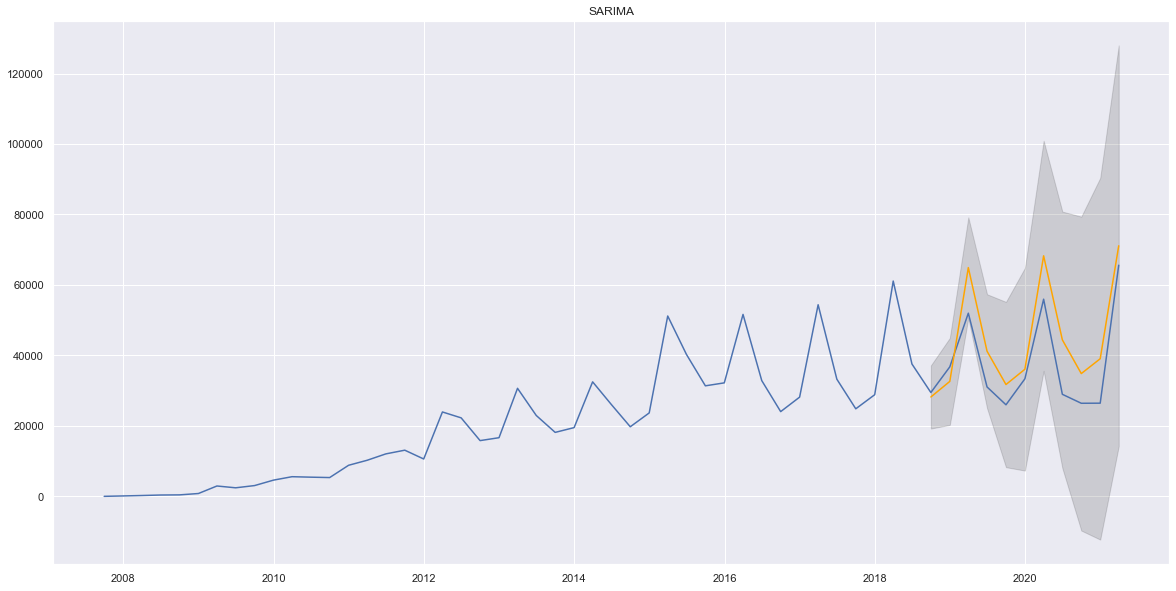

In [11]:
n_periods = 11
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)


# make series for plotting purpose
fitted_series = pd.Series(fitted, index=data.index[44:])
lower_series = pd.Series(confint[:, 0], index=data.index[44:])
upper_series = pd.Series(confint[:, 1], index=data.index[44:])

# Plot
plt.plot(data)
plt.plot(fitted_series, color='orange')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA")
plt.show()




TEST

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error as mae, mean_squared_error
print("MSE:", mean_squared_error(test.values, fitted),
     "MAPE:", mean_absolute_percentage_error(test.values, fitted),
      "MAE:", mae(test.values, fitted),
      "RMSE:", np.sqrt(mean_squared_error(test.values, fitted)))

MSE: 89114740.70290482 MAPE: 0.24245181644961883 MAE: 8296.055562831689 RMSE: 9440.060418392713


Plot Both

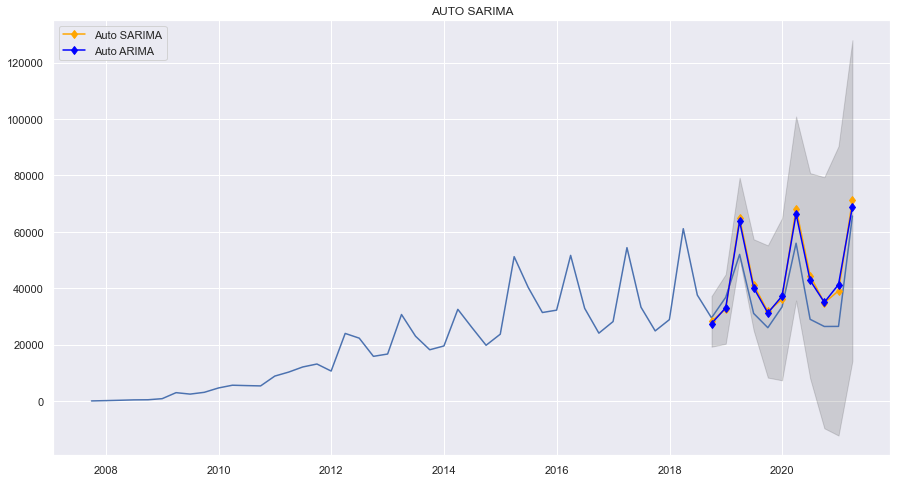

In [13]:
plt.figure(figsize=(15, 8))
plt.plot(data)
plt.plot(fitted_series, color='orange', marker='d', label = "Auto SARIMA")

plt.plot(fc_series, color='blue', marker='d', label = "Auto ARIMA")
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)
plt.legend(loc = "upper left")
plt.title("AUTO SARIMA")
plt.show()
